[*********************100%***********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_93300\3679360039.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(data['SMA_50'][sho

Profit from the ZOMATO.NS 50/200-day SMA strategy: $-434.43


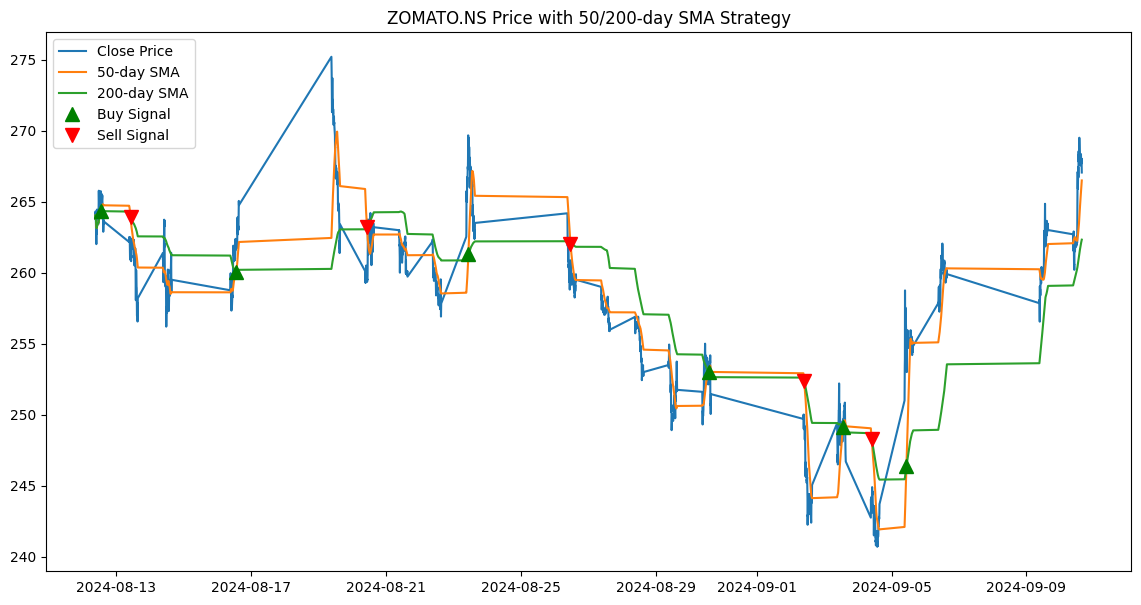

In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker = 'ZOMATO.NS'
data = yf.download(ticker, period='1mo', interval='5m')

short_window = 50  
long_window = 200  

data['SMA_50'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['SMA_200'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['SMA_50'][short_window:] > data['SMA_200'][short_window:], 1, 0)  # Golden Cross
data['Position'] = data['Signal'].diff()  # Difference to identify changes (buy/sell)

initial_balance = 10000 
balance = initial_balance
shares = 0

for i in range(1, len(data)):
    if data['Position'][i] == 1:  
        shares = balance / data['Close'][i]  
        balance = 0 
    elif data['Position'][i] == -1 and shares > 0: 
        balance = shares * data['Close'][i] 
        shares = 0 


if shares > 0:
    balance = shares * data['Close'][-1]

profit = balance - initial_balance

print(f"Profit from the {ticker} 50/200-day SMA strategy: ${profit:.2f}")

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-day SMA')
plt.plot(data['SMA_200'], label='200-day SMA')

plt.plot(data.loc[data['Position'] == 1].index, data['SMA_50'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data.loc[data['Position'] == -1].index, data['SMA_50'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title(f'{ticker} Price with 50/200-day SMA Strategy')
plt.legend(loc='best')
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_93300\2838428069.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Position'][i] == 1:
C:\Users\Acer\AppData\Local\Temp\ipykernel_93300\2838428069.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['Position'][i] == -1 and shares > 0:
C:\Users\Acer\AppData\Local\Temp\ipykernel_93300\2838428069.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To ac

Profit from the AMZN triple SMA strategy: $-159.77


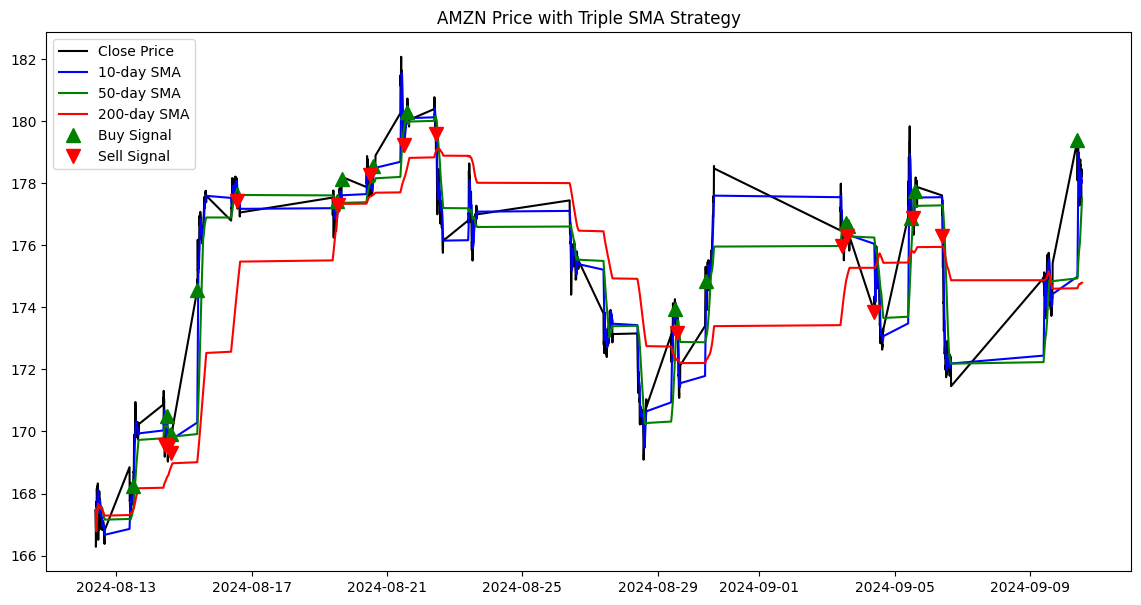

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# triple crosssover startegy

ticker = 'AMZN'
data = yf.download(ticker, period='1mo', interval='5m')

short_window = 10 
medium_window = 50  
long_window = 200 

data['SMA_10'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['SMA_50'] = data['Close'].rolling(window=medium_window, min_periods=1).mean()
data['SMA_200'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

data['Signal'] = np.where((data['SMA_10'] > data['SMA_50']) & (data['SMA_50'] > data['SMA_200']), 1, 0)

data['Position'] = data['Signal'].diff()

initial_balance = 10000  
balance = initial_balance
shares = 0

for i in range(1, len(data)):
    if data['Position'][i] == 1: 
        shares = balance / data['Close'][i]  
        balance = 0
    elif data['Position'][i] == -1 and shares > 0: 
        balance = shares * data['Close'][i]  
        shares = 0

if shares > 0:
    balance = shares * data['Close'][-1]

profit = balance - initial_balance

print(f"Profit from the {ticker} triple SMA strategy: ${profit:.2f}")

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='black')
plt.plot(data['SMA_10'], label='10-day SMA', color='blue')
plt.plot(data['SMA_50'], label='50-day SMA', color='green')
plt.plot(data['SMA_200'], label='200-day SMA', color='red')

plt.plot(data.loc[data['Position'] == 1].index, data['Close'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data.loc[data['Position'] == -1].index, data['Close'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title(f'{ticker} Price with Triple SMA Strategy')
plt.legend(loc='best')
plt.show()
